# Task 3 - Qiskit Aer Simulator

Tasks 1 and 2 only involve visualizing the states and the circuits using Qiskit.
To view the results of measurements, we need a simulator to run those circuits. Qiskit Aer is a powerful simulator for that matter.

In [66]:
# Add imports here, no code other than imports in this cell
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit_aer import AerSimulator

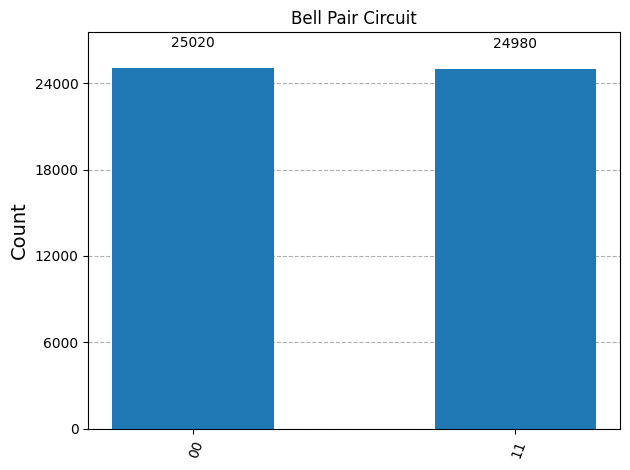

In [67]:
# Task 3.1 - Create a Bell pair circuit. Add measurements to all qubits.
# Take shots=10,000 and use all methods ('statevector', 'stabilizer', 'extended_stabilizer', 'density_matrix', 'matrix_product_state') to run the circuit and get the counts.
# Plot the counts in one histogram.
# Note: Some methods may take longer time to run.
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

total_count = {"00":0, "11":0}
methods = {'statevector', 'stabilizer', 'extended_stabilizer', 'density_matrix', 'matrix_product_state'}
for method in methods:
    backend = AerSimulator(method=method)
    qc_compiled = transpile(qc, backend)
    job_sim = backend.run(qc_compiled, shots=10000)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc_compiled)
    total_count['00'] += counts["00"]
    total_count['11'] += counts["11"]

plot_histogram(total_count, title="Bell Pair Circuit")


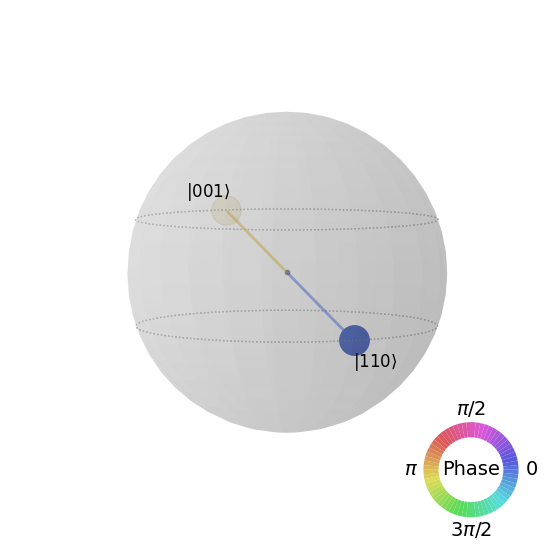

In [68]:
# Task 3.2 - Create a Cat state 1/sqrt(2)(|001> - |110>). Visualize the state using a qsphere.
state = Statevector.from_int(0, 2**3)
qc = QuantumCircuit(3)
qc.x(0)
qc.h(2)
qc.cx(2,1)
qc.cx(2,0)
qc.z(2)
state = state.evolve(qc)
state.draw('qsphere')

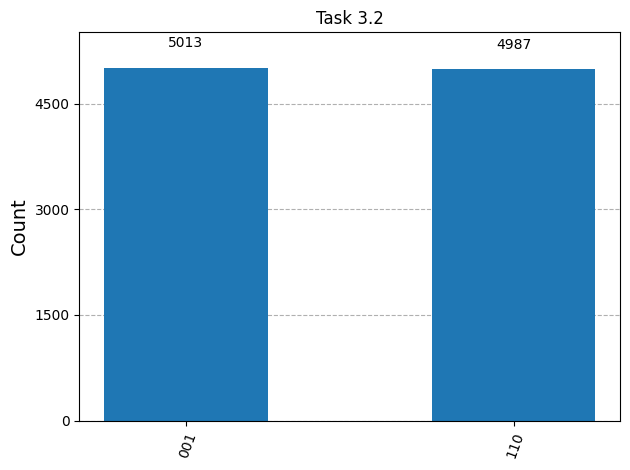

In [69]:
# Task 3.3 - Plot the histogram of the results of Task 3.2 after adding measurements to all qubits and running the circuit with shots=10,000 using density_matrix method.
qc.measure_all()
backend = AerSimulator(method='density_matrix')
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=10000)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts, title="Task 3.2")